 <style>
          h3 {
            color: green;
            font-weight: bold;
          }
  </style>
### Author: Chetand777

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

### 1) Data Understanding & Preprocessing

In [2]:
# Loading the data
url = "F:\Projects\Sparks-Foundation-Task-3-EDA-Retail\data\SampleSuperstore.csv"
data = pd.read_csv(url)
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
# Checking the shape of the data
data.shape

(9994, 13)

In [4]:
# Inspecting the data for datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
# Lets drop the postal code as we dont need it for further analysis
data.drop('Postal Code', axis=1, inplace=True)

In [6]:
# Chcking the distinct countries present in the data
data['Country'].value_counts()

Country
United States    9994
Name: count, dtype: int64

In [7]:
# All the data is related to single country i.e US. Lets drop it
data.drop('Country', axis=1, inplace=True)

In [8]:
# Now, check for missing values
data.isnull().sum()

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
# Checking for duplicates
data.duplicated().sum()

50

In [10]:
# Drop these duplicate values 
data.drop_duplicates(inplace=True)

In [11]:
# Inspecting the data again
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9944 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9944 non-null   object 
 1   Segment       9944 non-null   object 
 2   City          9944 non-null   object 
 3   State         9944 non-null   object 
 4   Region        9944 non-null   object 
 5   Category      9944 non-null   object 
 6   Sub-Category  9944 non-null   object 
 7   Sales         9944 non-null   float64
 8   Quantity      9944 non-null   int64  
 9   Discount      9944 non-null   float64
 10  Profit        9944 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 932.2+ KB


In [12]:
# Now, check for distribution of the data
data.describe()

,Sales,Quantity,Discount,Profit
count,9944.000000,9944.000000,9944.000000,9944.000000
mean,230.752150,3.794047,0.156440,28.770873
std,624.644765,2.228752,0.206584,234.841370
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.340000,2.000000,0.000000,1.724800
50%,55.000000,3.000000,0.200000,8.679950
75%,210.104000,5.000000,0.200000,29.534700
max,22638.480000,14.000000,0.800000,8399.976000


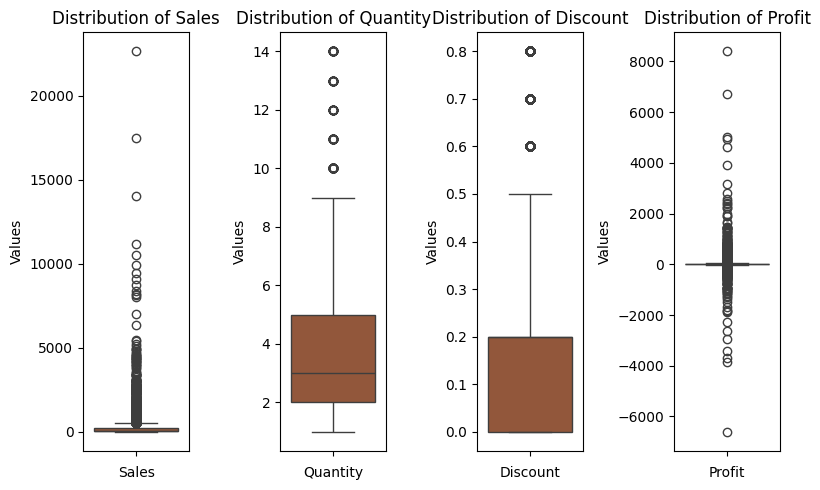

In [13]:
# Lets visualize the distribution using boxplot
num_cols = [col for col in data.columns if pd.api.types.is_numeric_dtype(data[col])]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(8, 5))

for i, col in enumerate(num_cols):
    sns.boxplot(y=data[col], ax=axes[i], color='sienna')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Values')

plt.tight_layout()

plt.show()

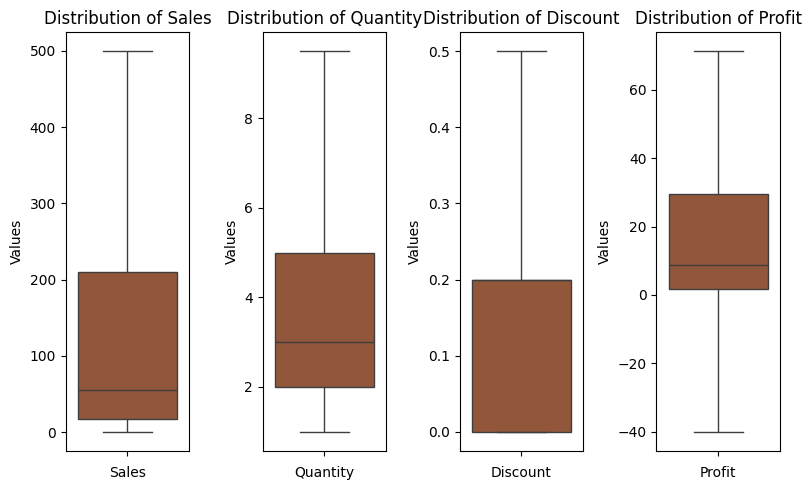

In [14]:
# Lets create a function to remove outliers
def remove_outliers(df, cols):
  for col in cols:
      if pd.api.types.is_numeric_dtype(df[col]):
          q1 = df[col].quantile(0.25)
          q3 = df[col].quantile(0.75)
          iqr = q3 - q1
          lower_bound = q1 - (1.5 * iqr)
          upper_bound = q3 + (1.5 * iqr)
          df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)

  return df[col]
  
remove_outliers(data, data.columns)

# Create subplots again
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(8, 5))

for i, col in enumerate(num_cols):
    sns.boxplot(y=data[col], ax=axes[i], color='sienna')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Values')

plt.tight_layout()

plt.show()

### 2) EDA

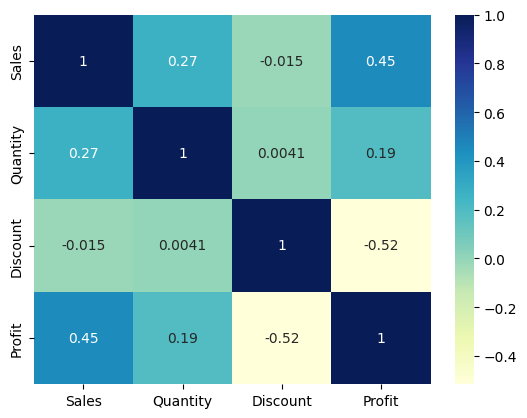

In [15]:
# Now, check the correlation between numeric variable 
num_cols = data.select_dtypes(exclude='object')
cor = num_cols.corr()
sns.heatmap(cor, annot=True, cmap='YlGnBu')
plt.show()

1. There is a positive correlation between profit & sales. As sales increases profit also increases
2. There is a negative correlation between profit & discount. As discount increases profit decreases

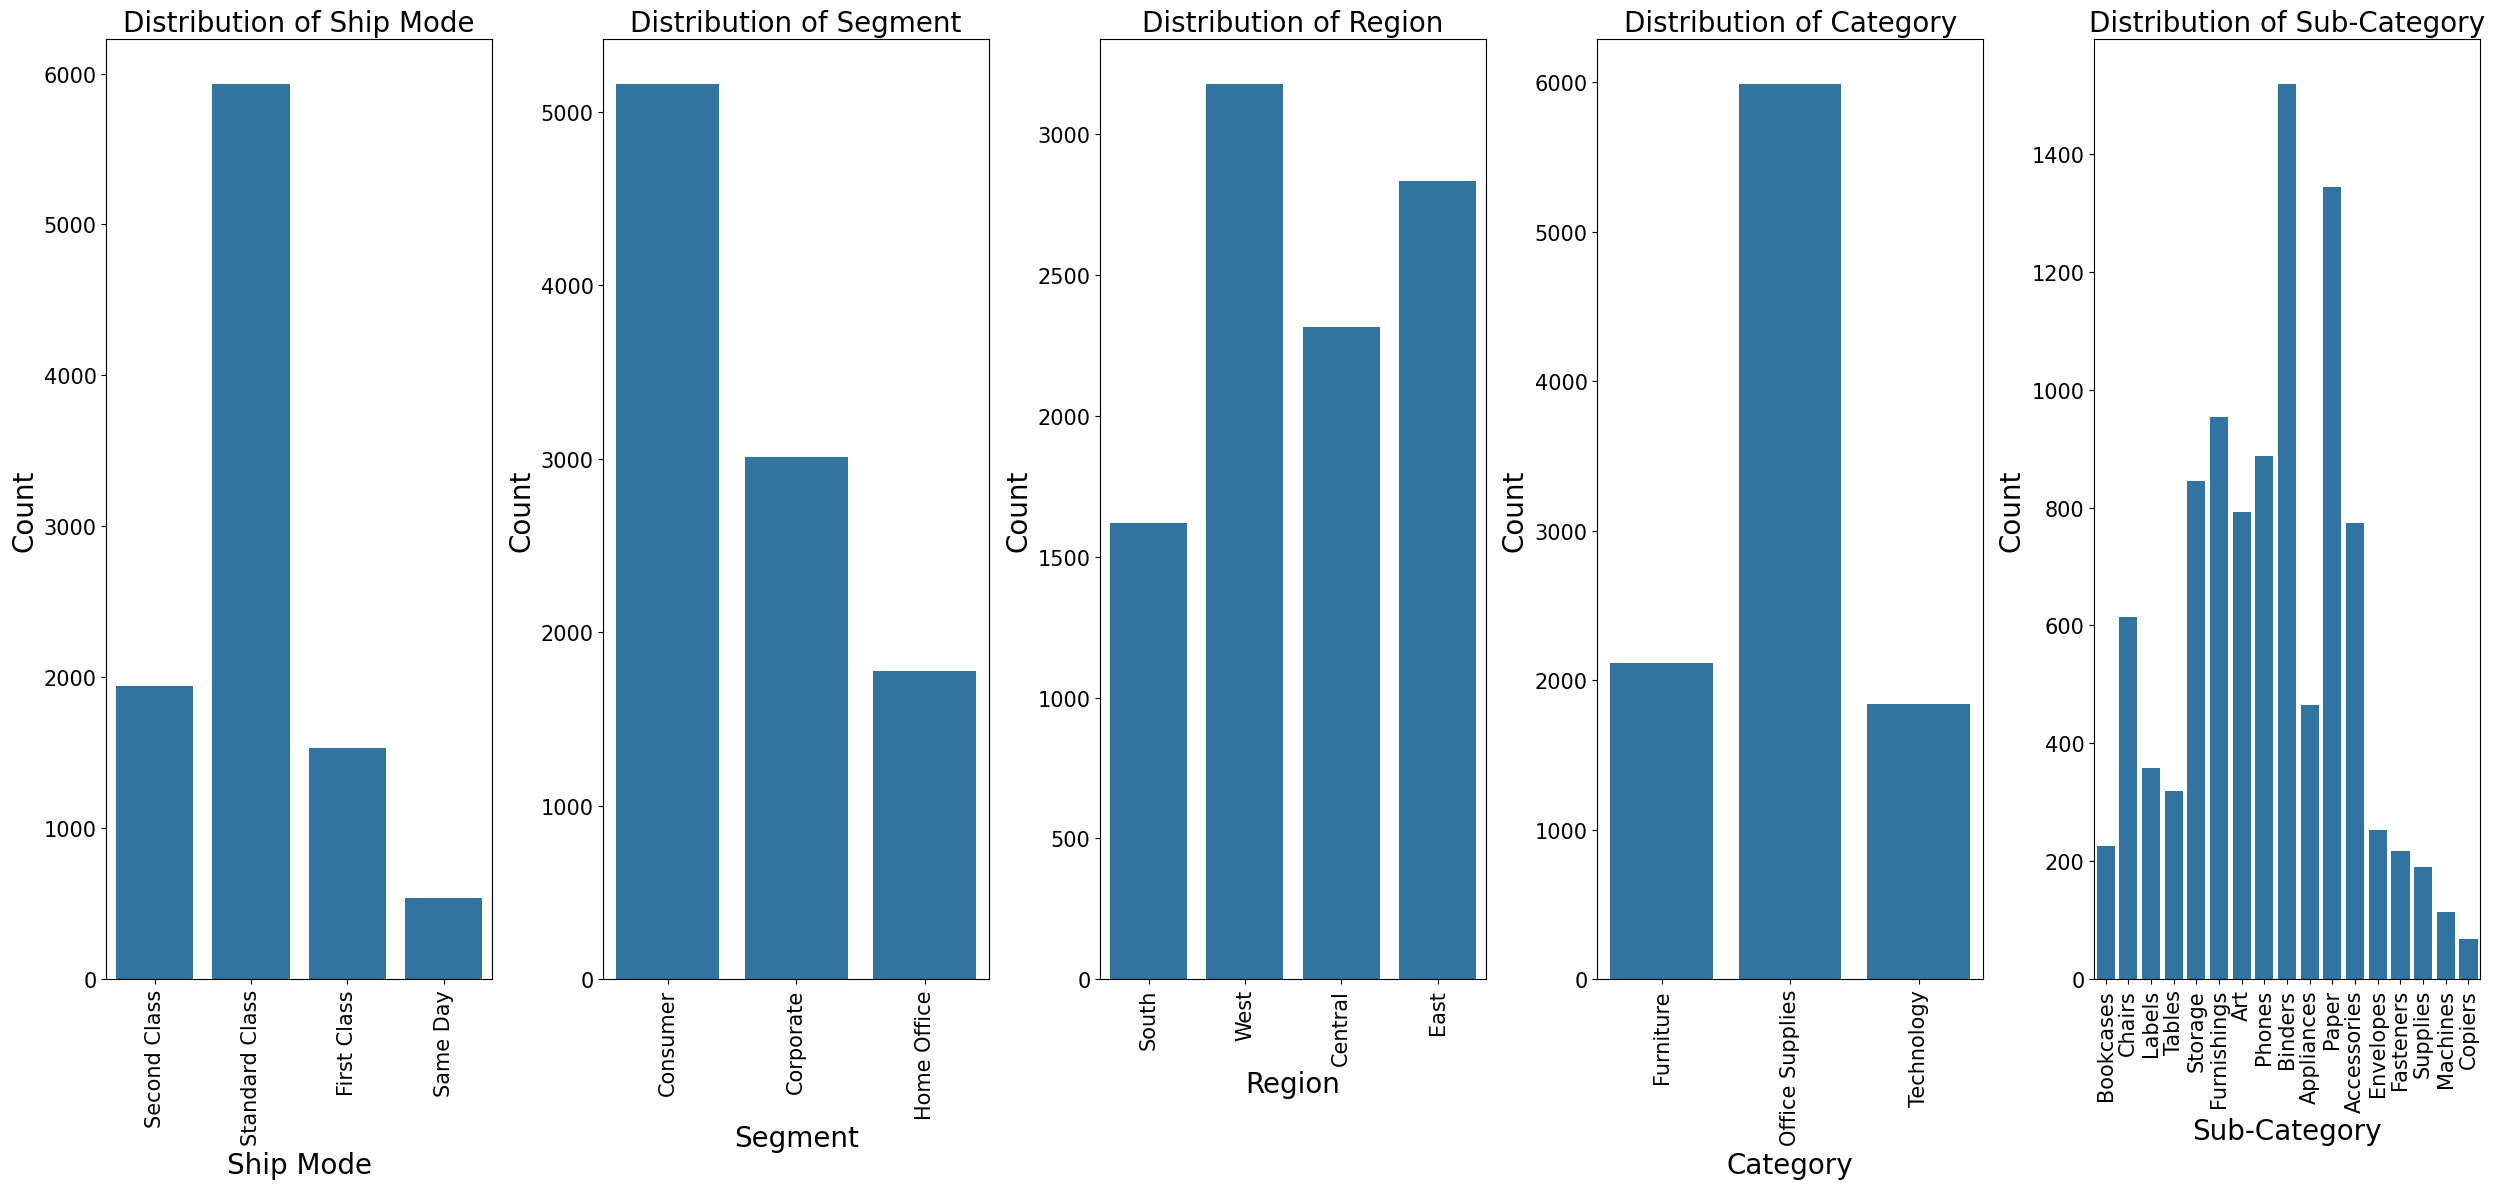

In [16]:
# Check the frequencies of categories in categorical columns
cat_cols = ['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category']

fig, axs = plt.subplots(nrows=1, ncols=len(cat_cols), figsize=(25, 12))

axs = axs.flatten()

for i, col in enumerate(cat_cols):
  sns.countplot(x=data[col], ax=axs[i])
  axs[i].set_title(f"Distribution of {col}", fontsize=20)
  axs[i].set_xlabel(col, fontsize=20)
  axs[i].set_ylabel('Count', fontsize=20)
  axs[i].tick_params(axis='x', rotation=90, labelsize=15)
  axs[i].tick_params(axis='y', labelsize=15)

plt.tight_layout()

plt.show()

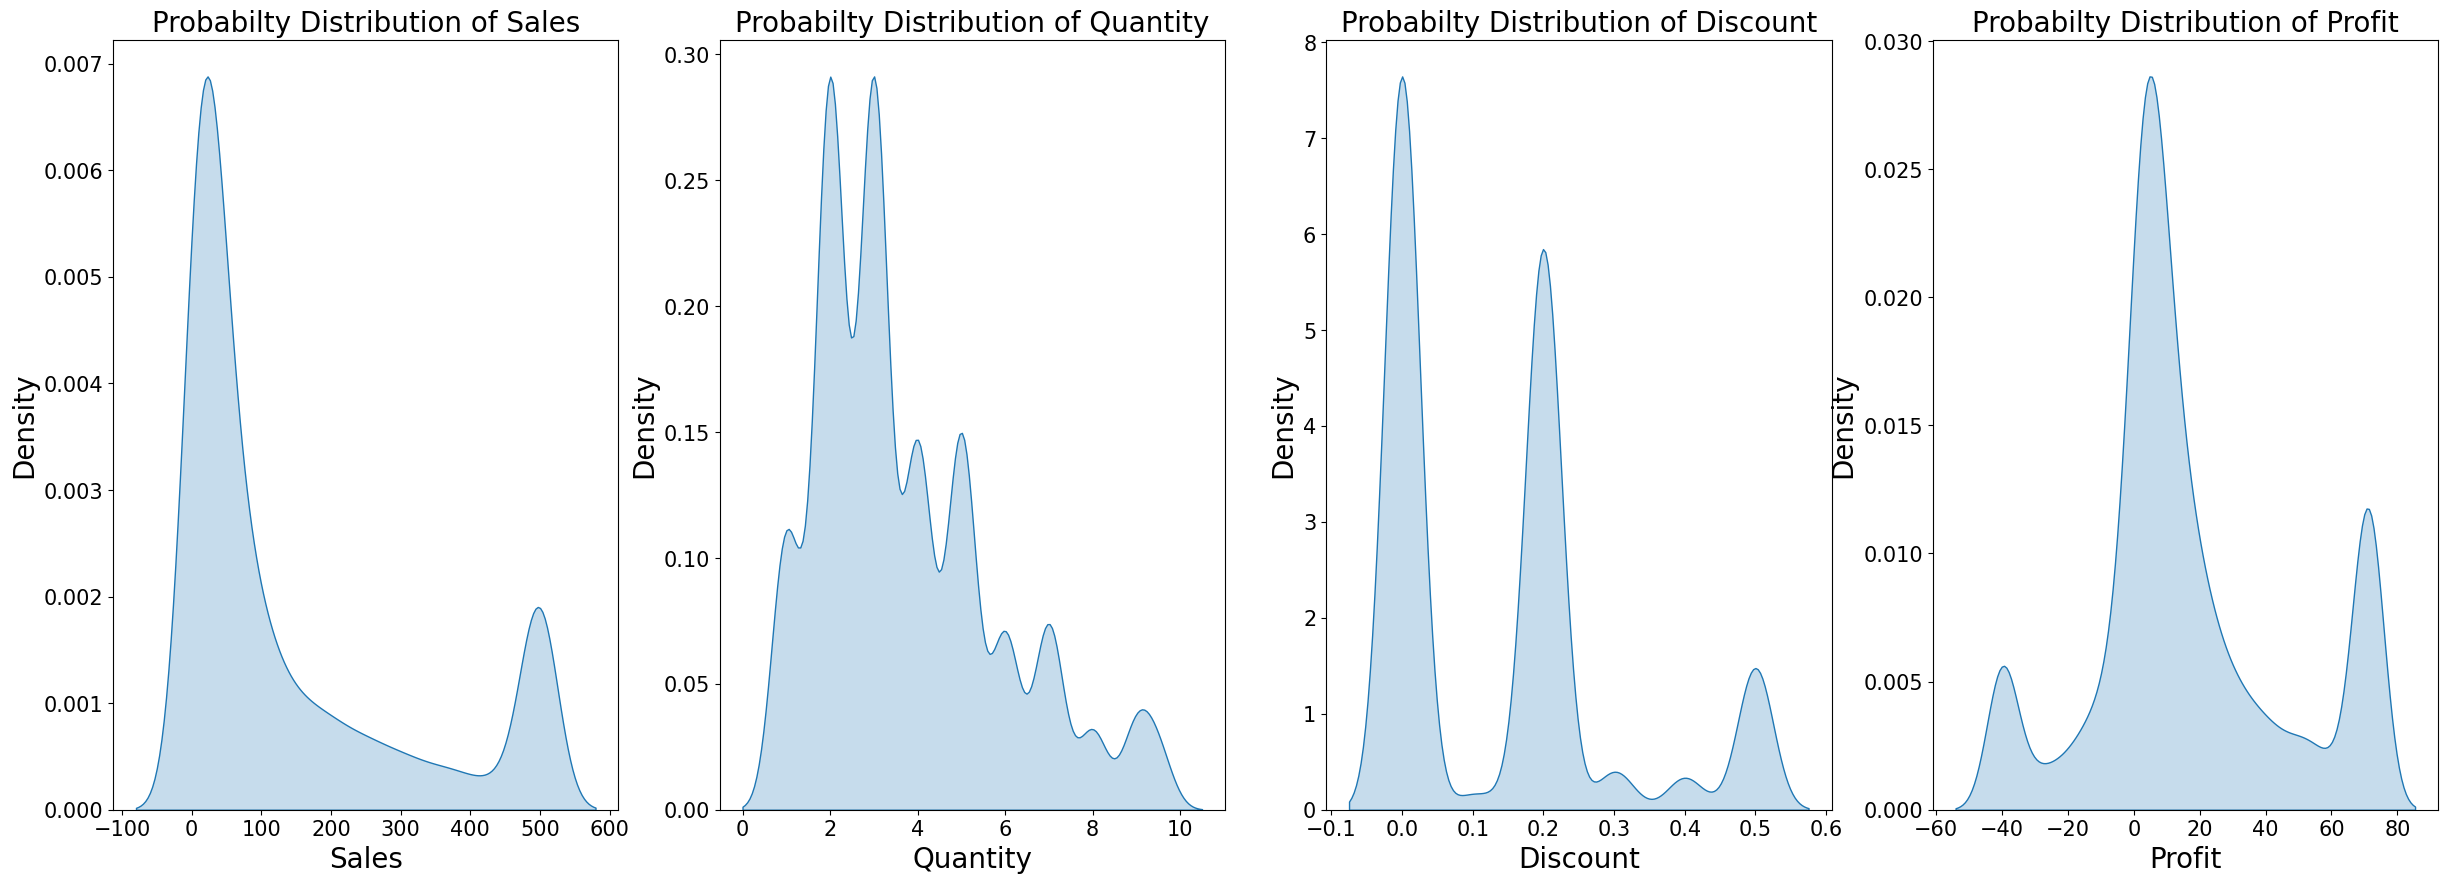

In [17]:
# Now, lets ckeck the distribution of numerical columns
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(30, 10))

for i, col in enumerate(num_cols):
  sns.kdeplot(x=data[col], shade=True, ax=axs[i])
  axs[i].set_title(f'Probabilty Distribution of {col}', fontsize=20)
  axs[i].set_xlabel(col, fontsize=20)
  axs[i].set_ylabel('Density', fontsize=20)
  axs[i].tick_params(axis='x', labelsize=15)
  axs[i].tick_params(axis='y', labelsize=15)

plt.show()

1. Multimodal probability distribution with multiple peaks showing the variabilty in the features
2. Right skewed distribution for sales & profit
3. Data is not normally distributed instead there are multiple groups with own central tendency

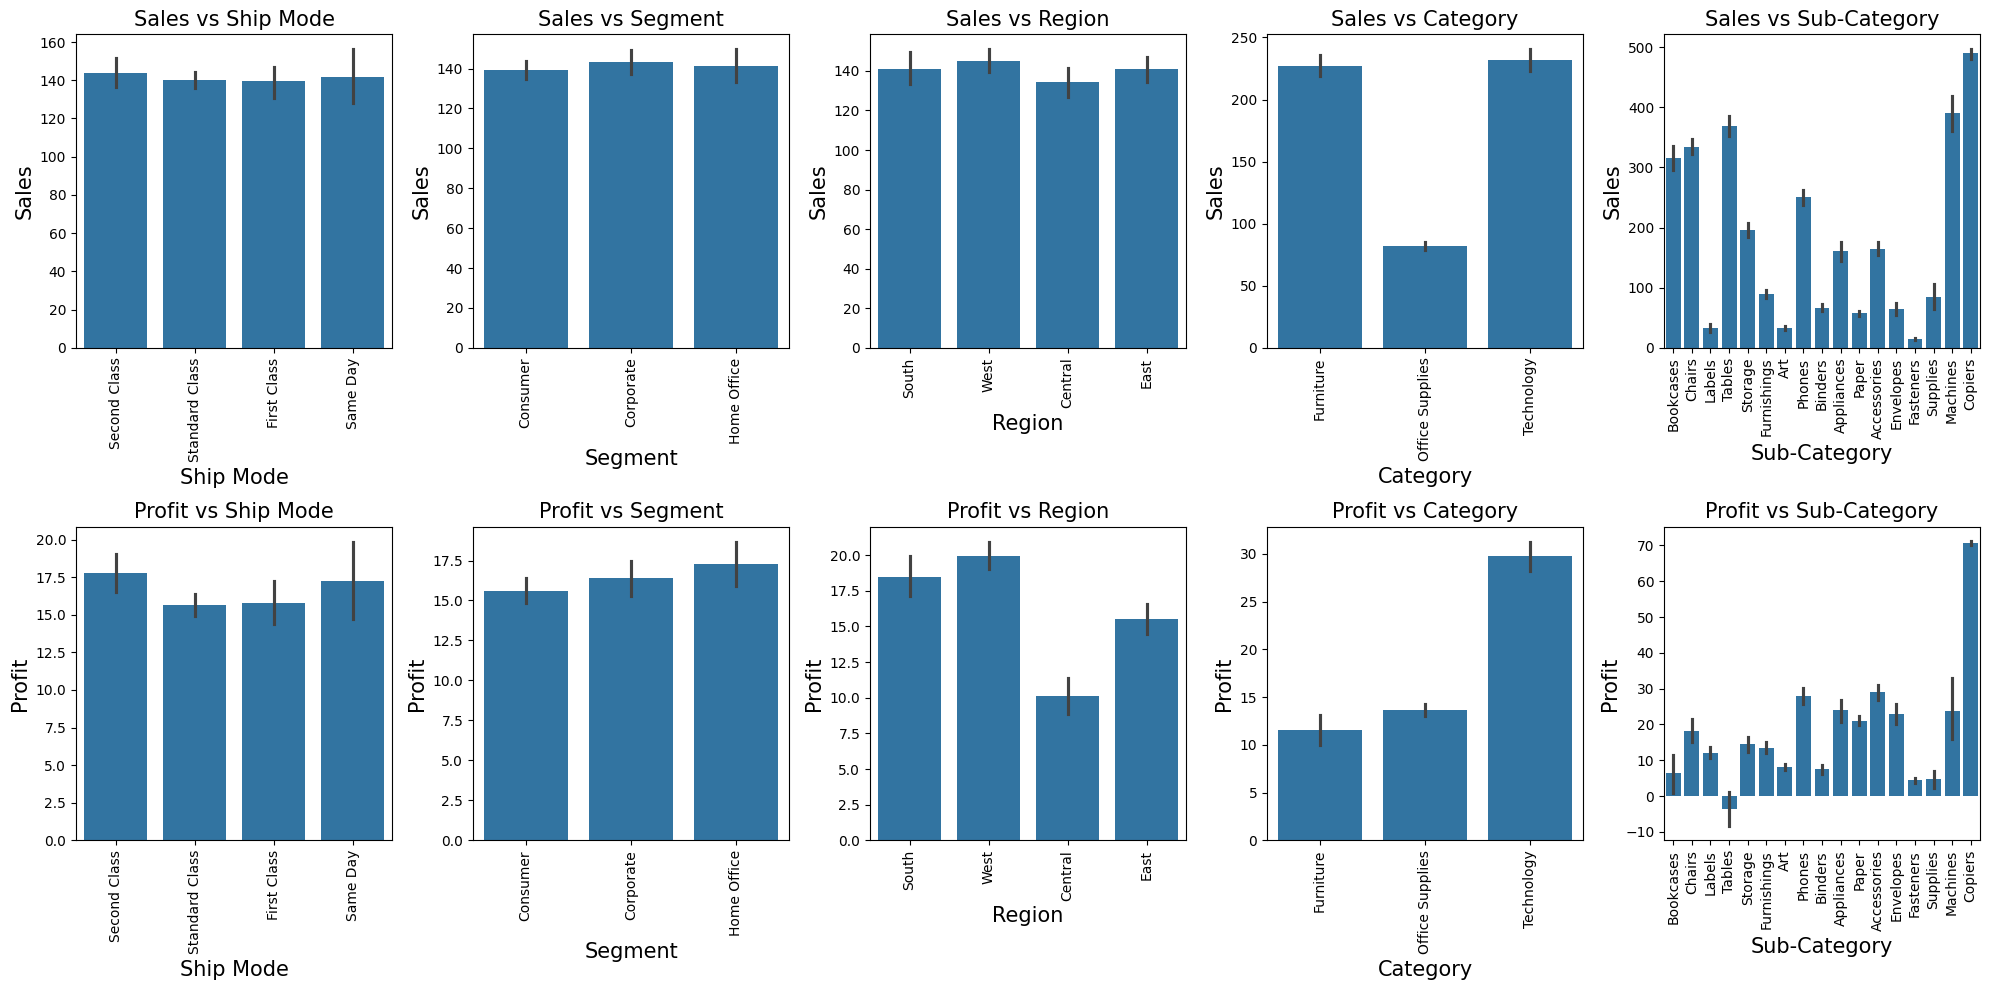

In [18]:
# Check the relation between categorical & numerical cols using bar plot
cat_cols = ['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category']
num_cols= ['Sales', 'Profit']

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20,10))


for i, num_col in enumerate(num_cols):
  for j, cat_col in enumerate(cat_cols):
    sns.barplot(x=cat_col, y=num_col, data=data, ax=axs[i, j])
    axs[i, j].set_title(f'{num_col} vs {cat_col}', fontsize=15)
    axs[i, j].set_xlabel(cat_col, fontsize=15)
    axs[i, j].set_ylabel(num_col, fontsize=15)
    axs[i, j].tick_params(axis='x', rotation=90, labelsize=10)

plt.tight_layout()

plt.show()

1. Sales of products in technology & furniture category is more than office supplies category. Also in subcategories the sales is more in copiers, machines, tables, chairs
2. The profit in technology category is more than others and in subcategories the profit is more in copiers and machines. Negative profit is observed in tables subcategory
3. W.r.t region the profit is more in south % west region as compared to other 
4. Slight difference in profit range is observed in all market segments & all ship modes as the sales of product is similar in all market segments & all ship modes
5. Inspite of greater product sales in central region, low profit is observed.

In [19]:
# Now, lets check the top 10 cities w.r.t profit & sales 
agg_data = data.groupby('City').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

top_n = 10
top_cities = agg_data.nlargest(top_n, 'Sales')

fig = px.bar(top_cities, x='City', y='Sales', hover_data=['Profit'], color='Profit',
             labels={'Sales':'Total Sales', 'Profit':'Total Profit'},
             title=f'Top {top_n} Cities by Sales & Profit')

fig.update_layout(xaxis={'categoryorder':'total descending'}, width=1000, height=600)
fig.show()

1. New York city & Los Angeles are top cities w.r.t total sales = 137.7k, total profit = 22275 & total sales = 113.91k, total profit = 16686.73 respectively

In [20]:
# Now, lets check the top 10 states w.r.t profit & sales 
agg_data = data.groupby('State').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

top_n = 10
top_cities = agg_data.nlargest(top_n, 'Sales')

fig = px.bar(top_cities, x='State', y='Sales', hover_data=['Profit'], color='Profit',
             labels={'Sales':'Total Sales', 'Profit':'Total Profit'},
             title=f'Top {top_n} States by Sales & Profit')

fig.update_layout(xaxis={'categoryorder':'total descending'}, width=1000, height=600)
fig.show()

1. California & New York are top states w.r.t total sales = 293.23k, total profit = 44747 & total sales = 168.73k, total profit = 27693 respectively

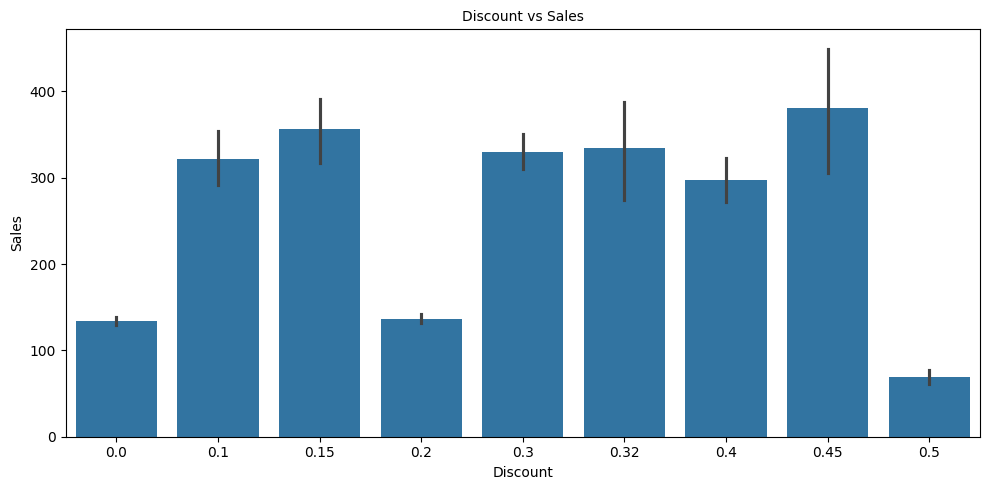

In [21]:
# Lets check the relation between discount and sales 
plt.figure(figsize=(10,5))
sns.barplot(x='Discount', y='Sales', data=data)
plt.title('Discount vs Sales', fontsize=10)
plt.xlabel('Discount', fontsize=10)
plt.ylabel('Sales', fontsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

plt.tight_layout()

plt.show()

1. There is no significant increase in sales w.r.t discount. 

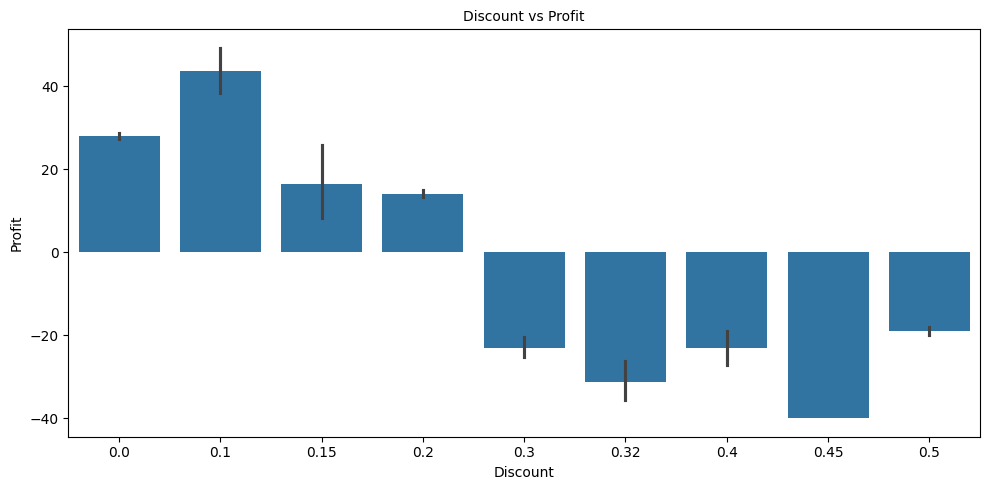

In [22]:
# check the relation between discount and profit 
plt.figure(figsize=(10,5))
sns.barplot(x='Discount', y='Profit', data=data)
plt.title('Discount vs Profit', fontsize=10)
plt.xlabel('Discount', fontsize=10)
plt.ylabel('Profit', fontsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

plt.tight_layout()

plt.show()

1. As we can see providing discounts not much helped in increasing profit

## Conclusion:
1. There is a positive correlation between profit & sales. As sales increases profit also increases
2. There is a negative correlation between profit & discount. As discount increases profit decreases
3. There is a Multimodal probability distribution with multiple peaks showing the variabilty in the features like sales, profit, quantity purchased and discount values. 
4. Sales of products in technology & furniture category is more than office supplies category. Also in subcategories the sales is more in copiers, machines, tables, chairs
5. The profit in technology category is more than others and in subcategories the profit is more in copiers and machines. Negative profit is observed in tables subcategory
6. W.r.t region the profit is more in south % west region as compared to other 
7. Slight difference in profit range is observed in all market segments & all ship modes as the sales of product is similar in all market segments & all ship modes
8. Inspite of greater product sales in central region, low profit is observed.
9. New York city & Los Angeles are top cities w.r.t total sales = 137.7k, total profit = 22275 & total sales = 113.91k, total profit = 16686.73 respectively
10. California & New York are top states w.r.t total sales = 293.23k, total profit = 44747 & total sales = 168.73k, total profit = 27693 respectively